In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score , roc_curve, auc , log_loss, roc_auc_score ,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sklearn.cluster as cluster
from scipy import stats
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df= pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
customer_5 = df.Dependents
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [6]:
customer_15 = df.StreamingMovies
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


In [7]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
customer_total_tenure=df[(df['gender'] =='Male') & (df['PaymentMethod'] =='Electronic check') & (df['SeniorCitizen'] ==1)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [8]:
two_mail_yes=df[(df['tenure'] ==2) & (df['PaymentMethod'] =='Mailed check') & (df['Churn'] =='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
235,1251-KRREG,Male,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,Yes
334,2868-SNELZ,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,80.60,155.8,Yes
658,4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.9,Yes
816,6275-YDUVO,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,86.20,178.7,Yes
950,4208-UFFGW,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.95,85.15,Yes
1335,4671-LXRDQ,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.00,96.45,Yes
2431,8263-JQAIK,Male,1,No,No,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.45,47.5,Yes
3373,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
3374,7580-UGXNC,Female,1,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,54.85,104.2,Yes


In [9]:
# Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333= df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2028,4452-ROHMO,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,331.6,No
6710,4342-HFXWS,Female,0,Yes,Yes,48,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),69.70,3023.65,No
5299,5569-OUICF,Female,1,Yes,No,28,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.30,2812.2,Yes
1268,2408-TZMJL,Male,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.15,6448.05,Yes
6078,9691-HKOVS,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,90.15,4916.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,2346-CZYIL,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.35,531.6,No
4370,8200-KLNYW,Female,0,Yes,No,21,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,80.90,1714.95,No
6702,2027-CWDNU,Male,0,Yes,Yes,18,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,85.60,1601.5,No
1851,2485-ITVKB,Female,0,Yes,No,2,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.10,68.75,Yes


In [10]:
# Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

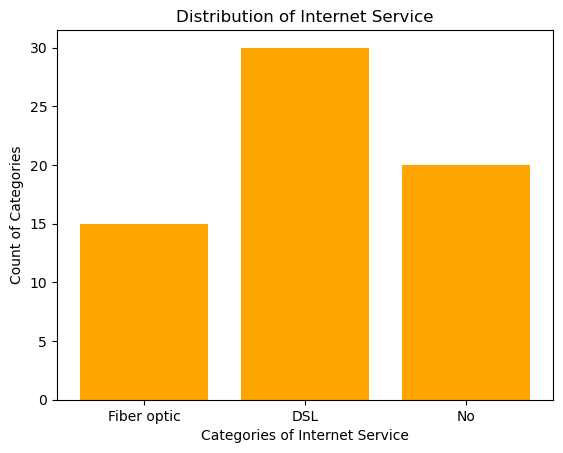

In [12]:
values = [15, 30, 20]
x=df['InternetService'].value_counts().keys().tolist() # why
plt.bar(x,values,color='orange')
plt.title('Distribution of Internet Service')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

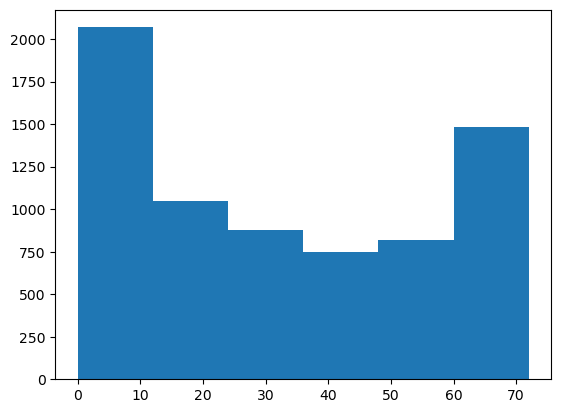

In [13]:
y1=(df.tenure)
plt.hist(y1, bins = 6)
plt.show

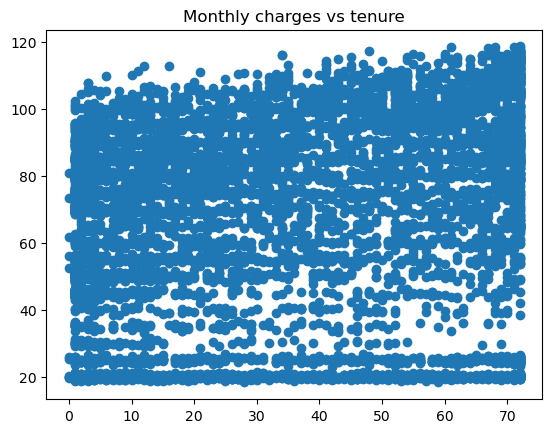

In [14]:
plt.title('Monthly charges vs tenure')
y= df['MonthlyCharges']
x= df['tenure']
plt.scatter(x,y)
plt.show()

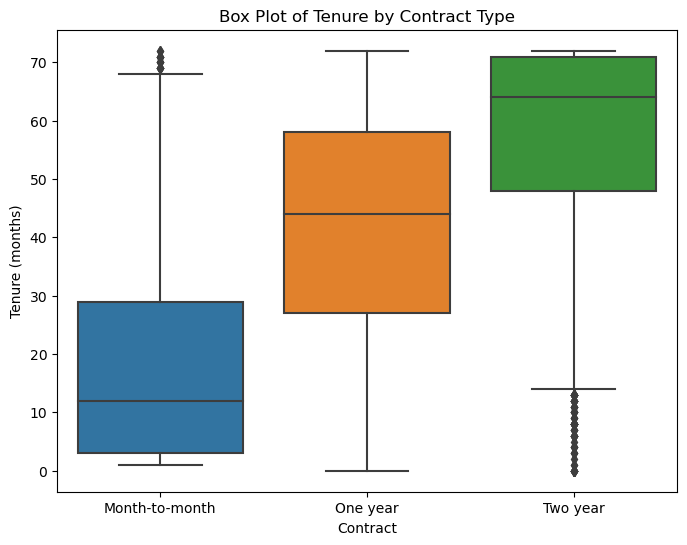

In [15]:
# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='tenure', data=df)

# Set labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure (months)')
plt.title('Box Plot of Tenure by Contract Type')

# Display the plot
plt.show()

In [16]:
# Linear Reg
x=df['MonthlyCharges'][: , np.newaxis]
y=df['tenure']
y.shape, x.shape

C:\Users\Admin-PC\AppData\Local\Temp\ipykernel_12588\4105049872.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=df['MonthlyCharges'][: , np.newaxis]


((7043,), (7043, 1))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4930, 1)
x_test shape: (2113, 1)
y_train shape: (4930,)
y_test shape: (2113,)


In [18]:
regressor = LinearRegression()
regressor.fit(x,y)
y_pred  =regressor.predict(x)
y_pred

array([25.30726568, 30.79056412, 30.16332334, ..., 25.25668175,
       34.3213227 , 40.64431444])

In [19]:
np.sqrt(mean_squared_error(y_pred,y))

23.79118393629873

In [20]:
r2_score(y_pred,y)

-14.272244082258524

In [21]:
# check null val

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
# div numeric and categorical val
nf=list(df._get_numeric_data().columns)
nf

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [23]:
cf=list(set(df.columns)-set(nf))
cf

['InternetService',
 'PaperlessBilling',
 'Dependents',
 'DeviceProtection',
 'Partner',
 'Contract',
 'PaymentMethod',
 'TechSupport',
 'OnlineSecurity',
 'StreamingTV',
 'StreamingMovies',
 'Churn',
 'TotalCharges',
 'customerID',
 'OnlineBackup',
 'gender',
 'PhoneService',
 'MultipleLines']

In [24]:
# logistic reg for churn dep var and monthly charges independant var
x=df.iloc[:,:-1] # it will take all columns except last one
y= df.iloc[:,-1]
print(x,y)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes  

In [25]:
x=df[['MonthlyCharges','tenure']]
y=df[['Churn']]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [27]:
log_mod=LogisticRegression()
print(log_mod.fit(x_train,y_train))


LogisticRegression()


C:\Users\Admin-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_pred= log_mod.predict(x_test)

In [29]:
confusion_matrix(y_test,y_pred)

array([[1654,  161],
       [ 369,  282]], dtype=int64)

In [30]:
accuracy_score(y_test,y_pred)

0.7850770478507705

In [31]:
y_train # encoding , convert both x and y to numeric

,Churn
5780,No
4120,No
1999,Yes
6215,Yes
549,No
...,...
6020,No
2285,Yes
863,Yes
3980,Yes


In [32]:
x_train

,MonthlyCharges,tenure
5780,20.20,53
4120,78.95,26
1999,74.95,23
6215,98.25,6
549,19.75,15
...,...,...
6020,61.25,34
2285,93.90,53
863,95.10,3
3980,105.70,28


In [33]:
# decision tree
x1=df[['MonthlyCharges','tenure']]
y1=df[['Churn']]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2)
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x1_train, y1_train)
y1_pred_gini=clf_gini.predict(x1_test)
accuracy_score(y1_test, y1_pred_gini)

0.6962384669978708

In [34]:
confusion_matrix(y1_test,y1_pred_gini)

array([[822, 214],
       [214, 159]], dtype=int64)

In [35]:
accuracy_score(y1_test,y1_pred_gini)

0.6962384669978708

In [36]:
# Random Forest
x=df[['MonthlyCharges','tenure']]
y=df[['Churn']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
clf1= RandomForestClassifier(min_samples_leaf=2, max_depth=5, random_state=9)
clf1.fit(x_train,y_train)

C:\Users\Admin-PC\AppData\Local\Temp\ipykernel_12588\57332634.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=9)

In [37]:
clf1= RandomForestClassifier(random_state=9)
parameters={'n_estimators':[5,10,5], 'max_features':['log2','sqrt'],'criterion':['entropy' , 'gini'],'max_depth':[2,4,6],'min_samples_split':[2,3,5],'min_samples_leaf':[1,3,5]}


In [38]:
# grid_obj= GridSearchCV(clf1,parameters,scoring=make_scorer(accuracy_score))
# grid=grid_obj.fit(x_train,y_train)
# clf1=grid.best_estimator_
clf1.fit(x_train,y_train)

C:\Users\Admin-PC\AppData\Local\Temp\ipykernel_12588\2603761394.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(x_train,y_train)


RandomForestClassifier(random_state=9)

In [42]:
y_pred= clf1.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[1296,  245],
       [ 312,  260]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.7363937529578798